In [1]:
import pandas as pd
import numpy as np
import sys
import nltk
from nltk.tokenize import WordPunctTokenizer
from textblob import TextBlob

In [61]:
df = pd.read_csv('D:Week01Tweets.csv')

In [62]:
df = df[df['Date']!='19-09-2020']
df.dropna(inplace=True)
df.drop(columns=['id'],inplace=True)
df.reset_index(drop=True, inplace=True)

In [100]:
df = df[df['author']!='propertiesindia']

In [63]:
def lenoftext(n):
    return len(n)
df['tweet_length'] = df['original_text'].apply(lenoftext)

In [64]:
len(df)

315630

In [65]:
def strtolist(n):
    n = nltk.wordpunct_tokenize(n)
    n = [word for word in n if word.isalnum()]
    return n

df['Mentions'] = df['Mentions'].apply(strtolist)
df['Hashtags'] = df['Hashtags'].apply(strtolist)

In [82]:
def polar(n):
    return TextBlob(n).sentiment.polarity
df['polarity'] = df['original_text'].apply(polar)

def sub(n):
    return TextBlob(n).sentiment.subjectivity
df['subjectivity'] = df['original_text'].apply(sub)

def senti(n):
    if n == 0:
        return 'Neutral'
    elif n > 0:
        return 'Positive'
    elif n <0:
        return 'Negative'
df['Sentiment'] = df['polarity'].apply(senti)

In [117]:
df

,created_at,source,original_text,author,favorite_count,place,Date,Hashtags,Mentions,clean_text,state,tweet_length,polarity,subjectivity,Sentiment
0,18-09-2020 07:19,Twitter for Android,@Airtel_Presence This is how bad your network ...,Yeshjain,0,!dea Nagendra Block,18-09-2020,[],[TRAI],This bad network speed amp say Airtel provides...,!dea nagendra block,138,0.150000,0.483333,Positive
1,14-09-2020 09:15,Twitter for Android,@ceo_uidai @UIDAI No Government SOP's follow...,Pratham96997780,0,10 Square Mall,14-09-2020,[],[UIDAI],No Government SOP followed ASK SQUARE MALL CHE...,10 square mall,140,-0.016667,0.066667,Negative
2,18-09-2020 18:29,Twitter for Android,I am happy to announce that justpenthoughts an...,BighneshaS,1,12 (O) Battalion N.C.C.,18-09-2020,[happy],[],I happy announce justpenthoughts secret ink pu...,12 (o) battalion n.c.c.,124,0.200000,0.850000,Positive
3,12-09-2020 02:18,Twitter for Android,Always help the helpless people.,Dilkhus44338898,1,17 Degrees,12-09-2020,[],[],Always help helpless people,17 degrees,32,0.000000,0.000000,Neutral
4,12-09-2020 02:09,Twitter for Android,First time childhood friends memories. https:/...,Dilkhus44338898,1,17 Degrees,12-09-2020,[],[],First time childhood friends memories,17 degrees,62,0.250000,0.333333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315625,13-09-2020 04:21,Twitter for Android,@bhagwadharihung Warned them and sent back? Why?,srsingh1503,0,भारत गणराज्य | Republic of India,13-09-2020,[],[bhagwadharihung],Warned sent back Why,Delhi,48,0.000000,0.000000,Neutral
315626,15-09-2020 09:09,Twitter for Android,@saurabh3vedi @Uppolice please assault him in ...,srsingh1503,1,भारत गणराज्य | Republic of India,15-09-2020,[],"[saurabh3vedi, Uppolice]",please assault fashion please stand hope u cre...,Delhi,140,0.000000,0.125000,Neutral
315627,18-09-2020 06:57,Twitter for Android,@punarutthana Instantly she played women/victi...,srsingh1503,0,भारत गणराज्य | Republic of India,18-09-2020,[],[punarutthana],Instantly played card,Delhi,55,0.000000,0.666667,Neutral
315628,13-09-2020 18:28,Twitter for Android,Ultimate double story new kothi\n5bhk\nModren ...,vikramanand1,0,ਲੁਧਿਆਣਾ,13-09-2020,[],[],Ultimate double story new kothi Modren kitchen...,Punjab,138,0.045455,0.484848,Positive


<AxesSubplot:ylabel='Sentiment'>

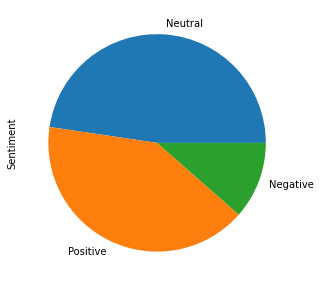

In [113]:
df.Sentiment.value_counts().plot.pie(figsize=(20,5))

<AxesSubplot:>

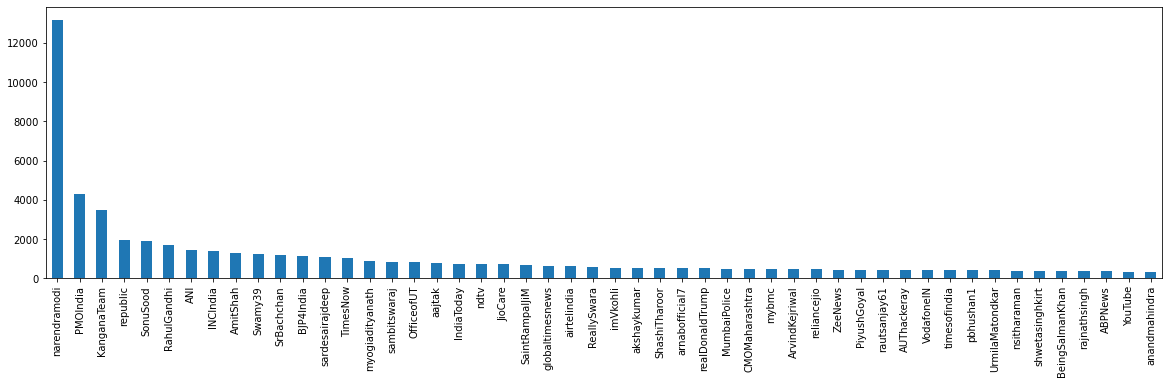

In [107]:
s = df['Mentions'].explode()
s.dropna(inplace=True)
s.value_counts().nlargest(50).plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

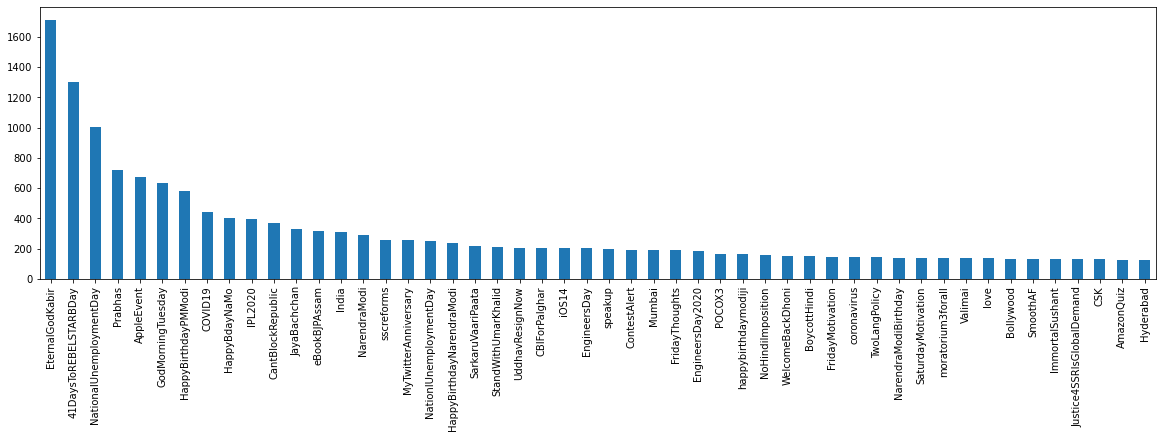

In [108]:
s = df['Hashtags'].explode()
s.dropna(inplace=True)
s.value_counts().nlargest(50).plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

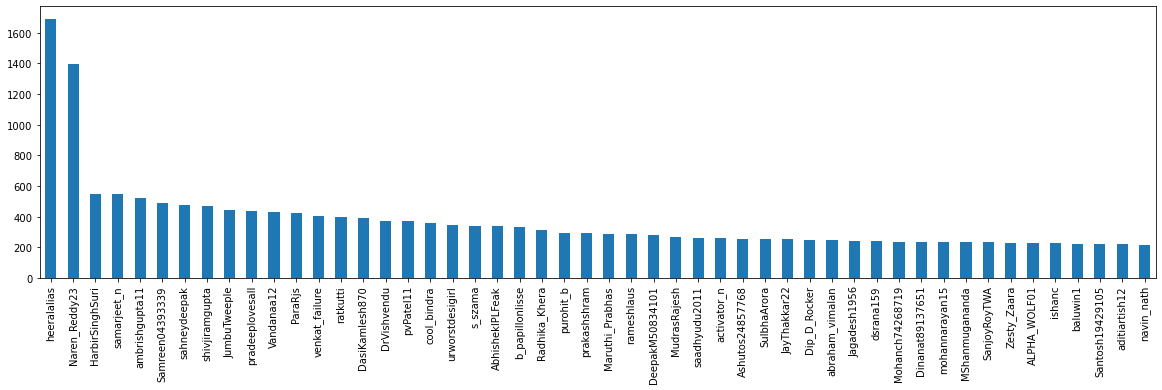

In [111]:
s = df['author'].explode()
s.dropna(inplace=True)
s.value_counts().nlargest(50).plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

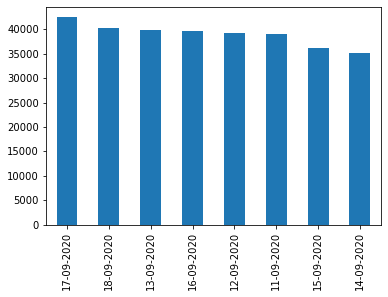

In [112]:
df['Date'].value_counts().plot(kind='bar')

In [115]:
df.to_csv('D:Week01draft01.csv',index = False)

In [116]:
df

,created_at,source,original_text,author,favorite_count,place,Date,Hashtags,Mentions,clean_text,state,tweet_length,polarity,subjectivity,Sentiment
0,18-09-2020 07:19,Twitter for Android,@Airtel_Presence This is how bad your network ...,Yeshjain,0,!dea Nagendra Block,18-09-2020,[],[TRAI],This bad network speed amp say Airtel provides...,!dea nagendra block,138,0.150000,0.483333,Positive
1,14-09-2020 09:15,Twitter for Android,@ceo_uidai @UIDAI No Government SOP's follow...,Pratham96997780,0,10 Square Mall,14-09-2020,[],[UIDAI],No Government SOP followed ASK SQUARE MALL CHE...,10 square mall,140,-0.016667,0.066667,Negative
2,18-09-2020 18:29,Twitter for Android,I am happy to announce that justpenthoughts an...,BighneshaS,1,12 (O) Battalion N.C.C.,18-09-2020,[happy],[],I happy announce justpenthoughts secret ink pu...,12 (o) battalion n.c.c.,124,0.200000,0.850000,Positive
3,12-09-2020 02:18,Twitter for Android,Always help the helpless people.,Dilkhus44338898,1,17 Degrees,12-09-2020,[],[],Always help helpless people,17 degrees,32,0.000000,0.000000,Neutral
4,12-09-2020 02:09,Twitter for Android,First time childhood friends memories. https:/...,Dilkhus44338898,1,17 Degrees,12-09-2020,[],[],First time childhood friends memories,17 degrees,62,0.250000,0.333333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315625,13-09-2020 04:21,Twitter for Android,@bhagwadharihung Warned them and sent back? Why?,srsingh1503,0,भारत गणराज्य | Republic of India,13-09-2020,[],[bhagwadharihung],Warned sent back Why,Delhi,48,0.000000,0.000000,Neutral
315626,15-09-2020 09:09,Twitter for Android,@saurabh3vedi @Uppolice please assault him in ...,srsingh1503,1,भारत गणराज्य | Republic of India,15-09-2020,[],"[saurabh3vedi, Uppolice]",please assault fashion please stand hope u cre...,Delhi,140,0.000000,0.125000,Neutral
315627,18-09-2020 06:57,Twitter for Android,@punarutthana Instantly she played women/victi...,srsingh1503,0,भारत गणराज्य | Republic of India,18-09-2020,[],[punarutthana],Instantly played card,Delhi,55,0.000000,0.666667,Neutral
315628,13-09-2020 18:28,Twitter for Android,Ultimate double story new kothi\n5bhk\nModren ...,vikramanand1,0,ਲੁਧਿਆਣਾ,13-09-2020,[],[],Ultimate double story new kothi Modren kitchen...,Punjab,138,0.045455,0.484848,Positive
